In [37]:
#https://blog.csdn.net/qq_33431368/article/details/119769361
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing


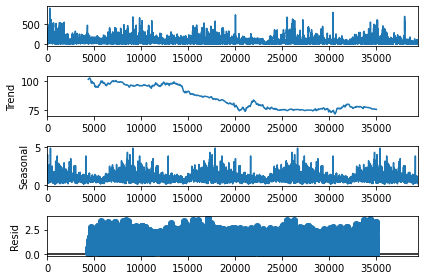

In [38]:
pf=pd.read_csv('library/csv/pm/beijing_final.csv')
decompose_result = seasonal_decompose(pf, model="multiplicative", period=8760)
decompose_result.plot()
plt.show()

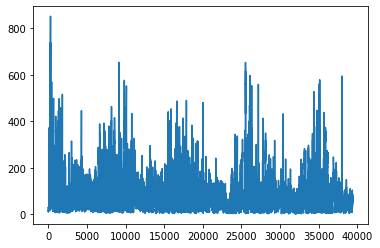

In [39]:
#第一次指数平滑
pf["1exp"] = SimpleExpSmoothing(pf["Value"]).fit(smoothing_level=0.5).fittedvalues
pf['1exp'].plot()
plt.show()

In [40]:
pf["2exp_add"] = ExponentialSmoothing(pf["Value"], trend="add", seasonal=None).fit().fittedvalues
pf["2exp_mul"] = ExponentialSmoothing(pf["Value"], trend="mul", seasonal=None).fit().fittedvalues


/root/.local/share/virtualenvs/Innovative-practice-zjFOS_of/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/root/.local/share/virtualenvs/Innovative-practice-zjFOS_of/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [41]:
pf["3exp_add"] = ExponentialSmoothing(pf["Value"], trend="add", seasonal="add", seasonal_periods=288).fit().fittedvalues
pf["3exp_mul"] = ExponentialSmoothing(pf["Value"], trend="mul", seasonal="mul", seasonal_periods=288).fit().fittedvalues

/root/.local/share/virtualenvs/Innovative-practice-zjFOS_of/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
/root/.local/share/virtualenvs/Innovative-practice-zjFOS_of/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/root/.local/share/virtualenvs/Innovative-practice-zjFOS_of/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,
